Code to generate supp. fig. 3

In [2]:
import warnings, os, sys, glob, nltools, scipy, matplotlib
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import numpy as np
import pandas as pd
from scipy import stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42 

sys.path.append('../Tools/')
sys.path.append('Functions/')
import FigureTools
import choiceModels
from nltools.stats import one_sample_permutation

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

## Simulate model throughout param space

In [3]:
allDataLong = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),header=None,index_col=None)
allDataLong.columns=['sub','Investment','Multiplier','Returned','exp','fair','soc1','soc2']

subDat = allDataLong.loc[allDataLong['sub']==124,:].copy()
subDat = subDat.loc[subDat['Investment']>0,:]

simDatTemp = subDat.copy()[['Investment','Multiplier']].drop_duplicates()
simDatTemp.columns = ['inv','mult']
simDatTemp = simDatTemp.sort_values(['mult','inv']).reset_index(drop=True)
simDatTemp['ret'] = np.nan
simDatTemp.shape

(30, 3)

In [4]:
simDatTemp.head()

,inv,mult,ret
0,1,2,NaN
1,2,2,NaN
2,3,2,NaN
3,4,2,NaN
4,5,2,NaN


In [5]:
thetas = np.arange(0,.501,.05)#[0,.1,.2,.3,.4,.5]
phis = np.round(np.arange(-.1,.101,.025),decimals=3)#[-.1,-.06,-.03,0,.03,.06,.1]
print(thetas)
print(phis)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[-0.1   -0.075 -0.05  -0.025 -0.     0.025  0.05   0.075  0.1  ]


In [6]:
allSimDat = pd.DataFrame(columns=['inv','mult','ret','theta','phi'])
for theta in thetas:
    for phi in phis:
        print(theta,phi),
        simDat = simDatTemp.copy()
        for row,dat in simDat.iterrows():
            ret = choiceModels.MP_model_ppSOE(dat['inv'],dat['mult'],-999,theta,phi)
            simDat.loc[row,'ret'] = ret
        simDat['theta'] = theta
        simDat['phi'] = phi
        allSimDat = allSimDat.append(simDat)

(0.0, -0.1) (0.0, -0.075) (0.0, -0.05) (0.0, -0.025) (0.0, -0.0) (0.0, 0.025) (0.0, 0.05) (0.0, 0.075) (0.0, 0.1) (0.05, -0.1) (0.05, -0.075) (0.05, -0.05) (0.05, -0.025) (0.05, -0.0) (0.05, 0.025) (0.05, 0.05) (0.05, 0.075) (0.05, 0.1) (0.1, -0.1) (0.1, -0.075) (0.1, -0.05) (0.1, -0.025) (0.1, -0.0) (0.1, 0.025) (0.1, 0.05) (0.1, 0.075) (0.1, 0.1) (0.15000000000000002, -0.1) (0.15000000000000002, -0.075) (0.15000000000000002, -0.05) (0.15000000000000002, -0.025) (0.15000000000000002, -0.0) (0.15000000000000002, 0.025) (0.15000000000000002, 0.05) (0.15000000000000002, 0.075) (0.15000000000000002, 0.1) (0.2, -0.1) (0.2, -0.075) (0.2, -0.05) (0.2, -0.025) (0.2, -0.0) (0.2, 0.025) (0.2, 0.05) (0.2, 0.075) (0.2, 0.1) (0.25, -0.1) (0.25, -0.075) (0.25, -0.05) (0.25, -0.025) (0.25, -0.0) (0.25, 0.025) (0.25, 0.05) (0.25, 0.075) (0.25, 0.1) (0.30000000000000004, -0.1) (0.30000000000000004, -0.075) (0.30000000000000004, -0.05) (0.30000000000000004, -0.025) (0.30000000000000004, -0.0) (0.300000

In [7]:
allSimDat.columns = ['Investment','Multiplier','Returned','Theta','Phi']
allSimDat.head()

,Investment,Multiplier,Returned,Theta,Phi
0,1,2,2.0,0.0,-0.1
1,2,2,4.0,0.0,-0.1
2,3,2,6.0,0.0,-0.1
3,4,2,8.0,0.0,-0.1
4,5,2,10.0,0.0,-0.1


In [8]:
allSimDat.shape

(2970, 5)

## Plot

In [9]:
def plot_sub_ax(plotDat,theta,phi,ax,plotLines=True):
    markers = ['^','o','v']
    handles = list()
    for multInd,mult in enumerate([6,4,2]):
        x_dat = plotDat.loc[plotDat['Multiplier']==mult,'Investment']
        y_dat = plotDat.loc[plotDat['Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        if plotLines:
            lm = scipy.stats.linregress(np.array(x_dat).astype(float),np.array(y_dat).astype(float))
            ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,31])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,31,5))
    ax.legend(handles,['x6','x4','x2'],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('(%.2f, %.2f)'%(theta,phi))

 (0.0, -0.1) (0.0, -0.075) (0.0, -0.05) (0.0, -0.025) (0.0, -0.0) (0.0, 0.025) (0.0, 0.05) (0.0, 0.075) (0.0, 0.1) (0.05, -0.1) (0.05, -0.075) (0.05, -0.05) (0.05, -0.025) (0.05, -0.0) (0.05, 0.025) (0.05, 0.05) (0.05, 0.075) (0.05, 0.1) (0.1, -0.1) (0.1, -0.075) (0.1, -0.05) (0.1, -0.025) (0.1, -0.0) (0.1, 0.025) (0.1, 0.05) (0.1, 0.075) (0.1, 0.1) (0.15000000000000002, -0.1) (0.15000000000000002, -0.075) (0.15000000000000002, -0.05) (0.15000000000000002, -0.025) (0.15000000000000002, -0.0) (0.15000000000000002, 0.025) (0.15000000000000002, 0.05) (0.15000000000000002, 0.075) (0.15000000000000002, 0.1) (0.2, -0.1) (0.2, -0.075) (0.2, -0.05) (0.2, -0.025) (0.2, -0.0) (0.2, 0.025) (0.2, 0.05) (0.2, 0.075) (0.2, 0.1) (0.25, -0.1) (0.25, -0.075) (0.25, -0.05) (0.25, -0.025) (0.25, -0.0) (0.25, 0.025) (0.25, 0.05) (0.25, 0.075) (0.25, 0.1) (0.30000000000000004, -0.1) (0.30000000000000004, -0.075) (0.30000000000000004, -0.05) (0.30000000000000004, -0.025) (0.30000000000000004, -0.0) (0.30000

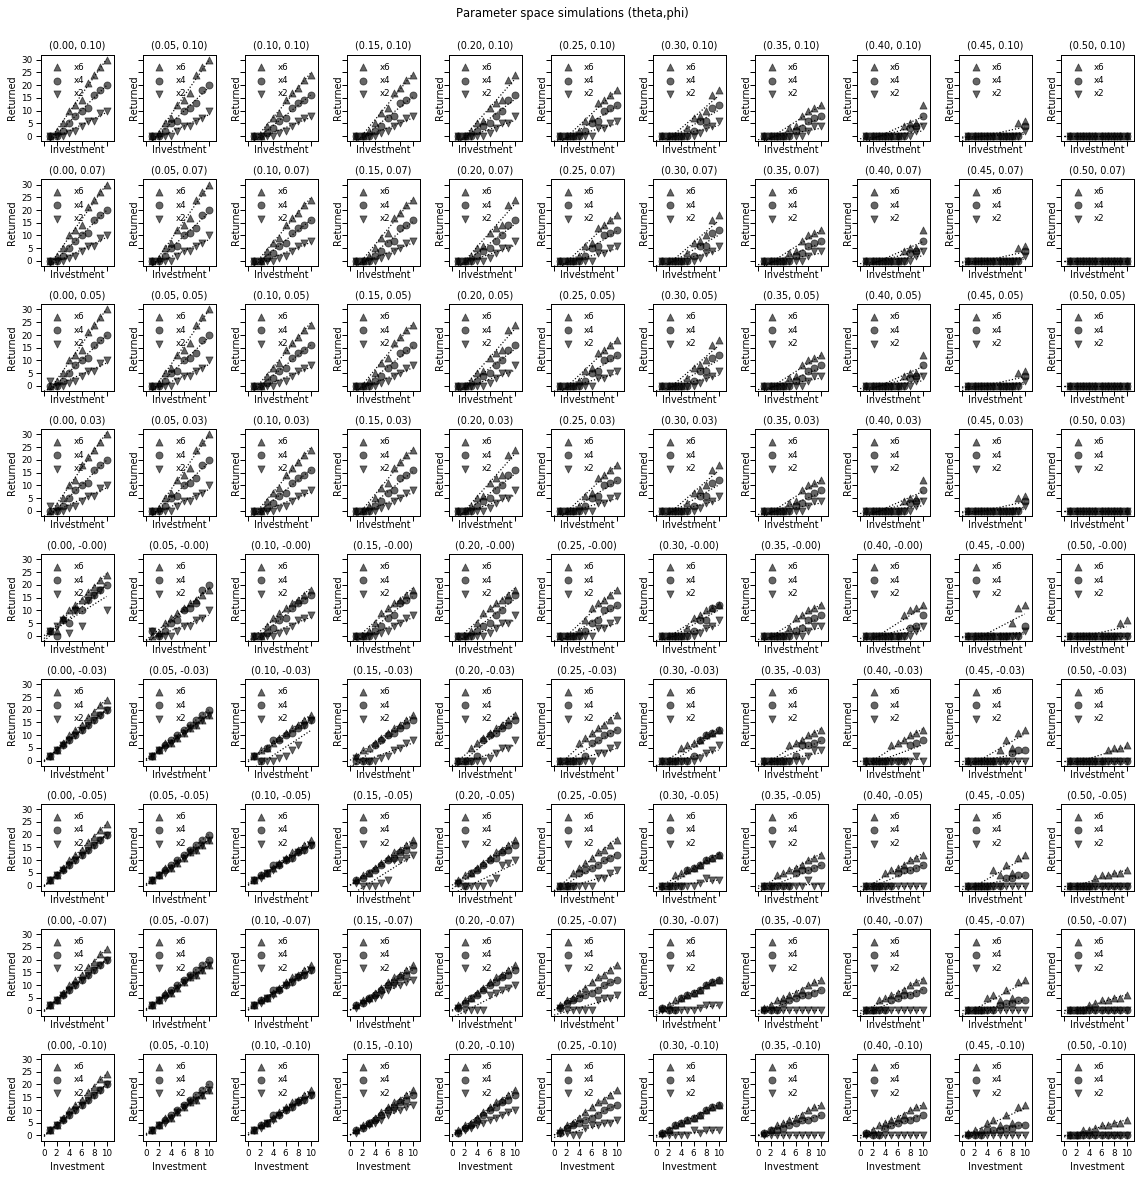

In [100]:
sns.set_context('paper')
markers = {2: "v", 4: 'd', 6:'^'}

fig,ax = plt.subplots(len(phis),len(thetas),figsize=(16,16),sharex=True,sharey=True)
for thetaInd,theta in enumerate(thetas):
    for phiInd,phi in enumerate(phis):
        print(theta,phi),
        plotDat = allSimDat.loc[(allSimDat['Theta']==theta) & (allSimDat['Phi']==phi),:].copy()
        axCur = ax[len(phis)-phiInd-1,thetaInd]
        plot_sub_ax(plotDat,theta,phi,axCur,plotLines=True)
plt.ylim([-2,32])
plt.tight_layout()
plt.suptitle('Parameter space simulations (theta,phi)',y=1.02)
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/SimulateModel.pdf'),
            bbox_inches='tight',transparent=True)